In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/college-placement/placement-dataset.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('/kaggle/input/college-placement/placement-dataset.csv', index_col='Unnamed: 0')
df.head(5)

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [4]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
cgpa,100.0,5.991,1.143634,3.3,5.075,6.0,6.9,8.5
iq,100.0,123.580,39.944198,37.0,101.500,127.5,149.0,233.0
placement,100.0,0.500,0.502519,0.0,0.000,0.5,1.0,1.0


## Data Visualization
Histogram:
- A histogram is a graphical representation of the distribution of a dataset. It is a way to visualize the underlying frequency distribution of a continuous variable. 
- In a histogram, the data is divided into intervals (bins), and the number of data points falling into each interval is represented by the height of a bar.

Advantage:
- Probability Distribution
- Campair 
- Most Frequent 
- Summerize

Text(0.5, 1.0, 'CGPA Distribution')

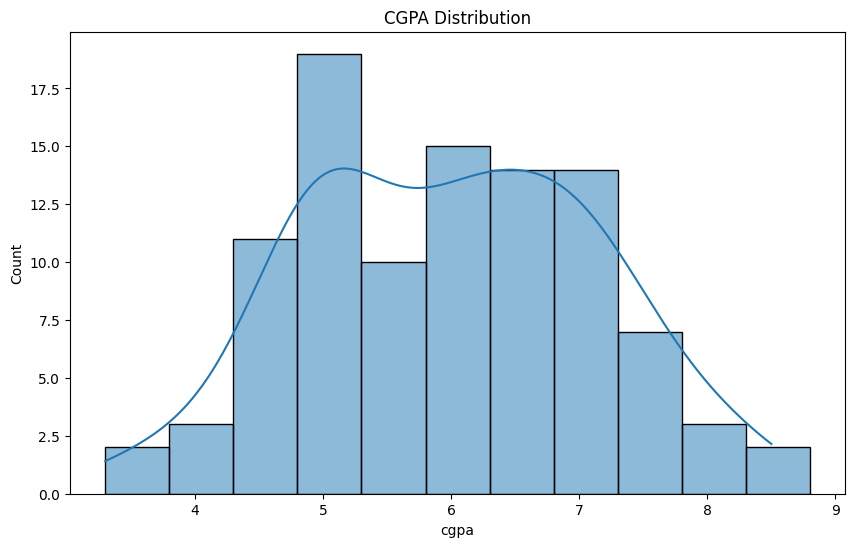

In [5]:
#Let's plot the distribution of the data 
plt.figure(figsize=(10,6))
sns.histplot(df.cgpa,kde = True, bins=3, binwidth=0.5)
plt.title('CGPA Distribution')

Text(0.5, 1.0, 'iq Distribution')

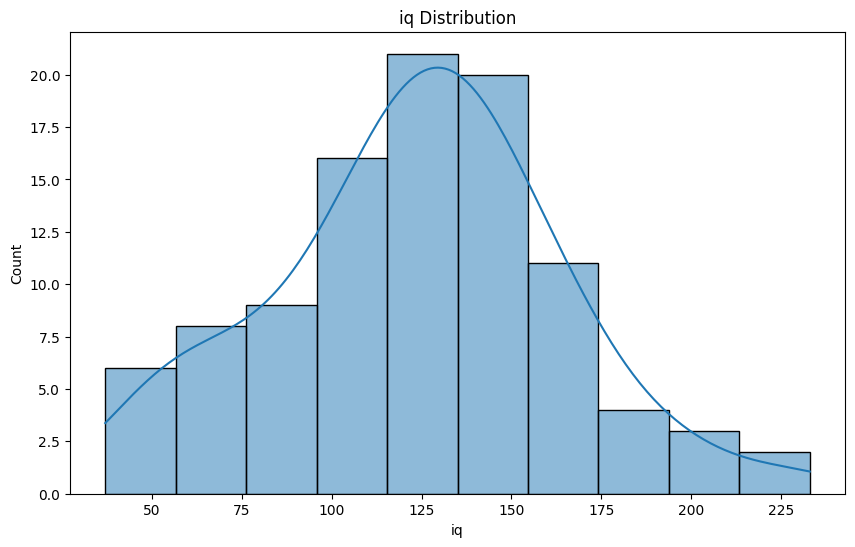

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(df.iq, kde = True)
plt.title('iq Distribution')

### Check if the **CGPA** follow normal distribution
> If the p-value is greater than the significance level __(commonly 0.05)__, you would fail to reject the null hypothesis. This would suggest that there isn't enough evidence to conclude that the __CGPA__ data significantly deviates from a normal distribution.

In [7]:
from scipy.stats import shapiro
statistic, p_value = shapiro(df.cgpa)
print(statistic,p_value)

0.9849948287010193 0.3173207938671112


### Check if the **IQ** follow normal distribution
> If the p-value is greater than the significance level __(commonly 0.05)__, you would fail to reject the null hypothesis. This would suggest that there isn't enough evidence to conclude that the __IQ__ data significantly deviates from a normal distribution.

In [8]:
from scipy.stats import shapiro
statistic, p_value = shapiro(df.iq)
print(statistic,p_value)

0.9866256713867188 0.4129476547241211


In [9]:
df.corr()

,cgpa,iq,placement
cgpa,1.000000,-0.098791,0.821688
iq,-0.098791,1.000000,-0.083031
placement,0.821688,-0.083031,1.000000


### Scatter Plot:
- Scatter plot show the corelation between data points or big data, it show changes of one data how it effect the other data.
- it can show the outliers and we can remove it.
- Also known Scatter Plot, X-Y plot, Scatter Chart, Correllation chart.
- Help to find the corellation between 2 points, for example; 
    * study_time vs marks: Higher the study time higher the marks
    * it show the linear corellation 
- Degree of Corellation:
    * None, Low, High, Perfect
- Type of Corellation:
    * Positive: Lower to Higher
    * Negative: Higher to lower
    * Curved  : Combination of both +ve and -ve corelation
    * Partical: at a certain data it show corelation 
    

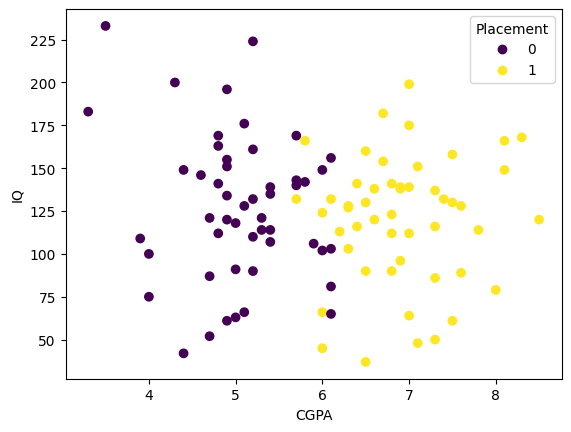

In [10]:
import matplotlib.pyplot as plt
scatter = plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

# Add legend based on unique values in the 'placement' column
plt.legend(*scatter.legend_elements(), title='Placement')

# Labeling the axes
plt.xlabel('CGPA')
plt.ylabel('IQ')

# Show the plot
plt.show()

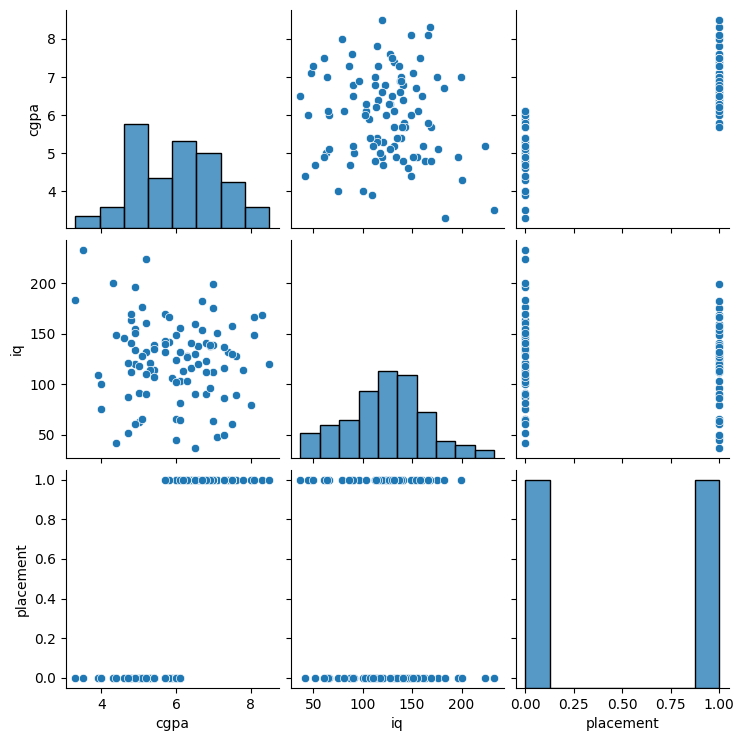

In [11]:
import seaborn as sns
sns.pairplot(df)

## Divide Dependent an Independent data

In [12]:
X = df.iloc[:,:2]
y = df.iloc[:,-1]

In [13]:
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [14]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

## Split the data into training and testing

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 2), (20, 2), (80,), (20,))

## Scale the data

In [17]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(np.array(df.cgpa).reshape(-1,1))
y = MinMaxScaler().fit_transform(np.array(df.iq).reshape(-1,1))

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
print("Test Data:\n",X_test[:5,:])
print("\nTrain Data:\n",X_train[:5,:])

Test Data:
 [[ 0.09813391  0.52735535]
 [-0.49920291  0.01226408]
 [-0.24320142 -0.06132039]
 [ 1.29280754 -1.80281944]
 [-1.0112059   0.15943301]]

Train Data:
 [[-1.41023456 -2.02134474]
 [ 0.00664161 -1.40609713]
 [ 0.89218921  2.00340002]
 [ 0.62652493  0.84981076]
 [-1.14457028  0.0038453 ]]


## Train a model use logistic regression

In [19]:
def LogisticModol(X_train, y_train):
    clf = LogisticRegression()
    clf.fit(X_train,y_train)
    y_prec = clf.predict(X_test)
    score = accuracy_score(y_test,y_prec)
    return clf, score
clf, score = LogisticModol(X_train, y_train)
print(score)

0.75


## Visulaize the Decision Boundary

<Axes: >

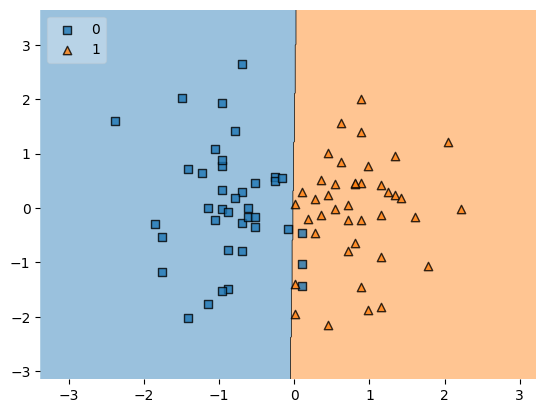

In [20]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

### For Optimizing hyperparameters of a Support Vector Machine (SVM) classifier, we are using Optuna library.

## Optimization Techniques
>these 1, 2 optimzation techiniques are perform well when we have smaller number of parameter to be optimize. and when parameters get increase these optimization gets computational expensive. it is like an iteration where it check for one by one.
1. GridSearchCV Optimzation
1. RandomSearchCV Optimzation
1. Bayesian Optimzaiton 
>To Implement Bayesian Optimzation we are using Optuna Library.

In [21]:
import optuna

import sklearn.datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


def objective(trial):
    iris = sklearn.datasets.load_iris()
    x, y = iris.data, iris.target

    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    max_depth = trial.suggest_int("max_depth", 2, 32, log=True)
    n_estimators = trial.suggest_int("n_estimators", 100,500)

    rf = sklearn.ensemble.RandomForestClassifier(criterion =criterion,
            max_depth=max_depth, 
            n_estimators=n_estimators
        )

    score = cross_val_score(rf, X_train, y_train, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=15)

[I 2024-01-12 20:55:13,852] A new study created in memory with name: no-name-818bbec3-a7b6-49f0-ae16-286f5f22f3c7
[I 2024-01-12 20:55:17,044] Trial 0 finished with value: 0.9373219373219372 and parameters: {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 253}. Best is trial 0 with value: 0.9373219373219372.
[I 2024-01-12 20:55:19,282] Trial 1 finished with value: 0.9249762583095916 and parameters: {'criterion': 'entropy', 'max_depth': 22, 'n_estimators': 380}. Best is trial 0 with value: 0.9373219373219372.
[I 2024-01-12 20:55:20,180] Trial 2 finished with value: 0.9373219373219372 and parameters: {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 271}. Best is trial 0 with value: 0.9373219373219372.
[I 2024-01-12 20:55:21,019] Trial 3 finished with value: 0.9249762583095915 and parameters: {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 257}. Best is trial 0 with value: 0.9373219373219372.
[I 2024-01-12 20:55:21,624] Trial 4 finished with value: 0.9002849002849004 and pa

In [22]:
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.9373219373219372
Best hyperparameters: {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 253}


In [23]:
import optuna
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, train_test_split

def objective(trial):
    # Hyperparameter search space
    C = trial.suggest_float('C', 1e-5, 100)
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'sigmoid'])
    degree = trial.suggest_int('degree', 2, 5) if kernel == 'poly' else None
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto']) if kernel in ['rbf', 'poly', 'sigmoid'] else 'scale'

    # Create SVM model
    if kernel == 'poly':
        svc = SVC(C=C, kernel=kernel, degree=degree, gamma=gamma)
    else:
        svc = SVC(C=C, kernel=kernel, gamma=gamma)

    # Evaluate the model using cross-validation
    score = cross_val_score(svc, X_train, y_train, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy

# Create Optuna study and optimize hyperparameters
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=15)

[I 2024-01-12 20:55:31,739] A new study created in memory with name: no-name-aa4046e2-e9fa-4246-b84f-09355018112e
[I 2024-01-12 20:55:31,760] Trial 0 finished with value: 0.9121557454890787 and parameters: {'C': 26.790039585368017, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 0 with value: 0.9121557454890787.
[I 2024-01-12 20:55:31,784] Trial 1 finished with value: 0.9121557454890787 and parameters: {'C': 87.77411440053906, 'kernel': 'poly', 'degree': 3, 'gamma': 'auto'}. Best is trial 0 with value: 0.9121557454890787.
[I 2024-01-12 20:55:31,808] Trial 2 finished with value: 0.8243114909781576 and parameters: {'C': 31.640327314305154, 'kernel': 'poly', 'degree': 5, 'gamma': 'auto'}. Best is trial 0 with value: 0.9121557454890787.
[I 2024-01-12 20:55:31,837] Trial 3 finished with value: 0.4121557454890788 and parameters: {'C': 17.65264581167319, 'kernel': 'poly', 'degree': 4, 'gamma': 'scale'}. Best is trial 0 with value: 0.9121557454890787.
[I 2024-01-12 20:55:31,854] Trial 4 

In [24]:
# Get the best parameters
best_params = study.best_params
print("Best Parameters:", best_params)

# Train the final model with the best parameters on the entire training set
best_svc = SVC(**best_params)
best_svc.fit(X_train, y_train)

# Evaluate the final model on the test set
test_accuracy = best_svc.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'C': 95.01544026942365, 'kernel': 'rbf', 'gamma': 'scale'}
Test Accuracy: 0.75
